In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
# linear regression model
class Model(object):
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
  
  def __call__(self, x):
    return self.W * x + self.b

In [3]:
# MSE: Mean Squared Error
def loss_function(y, predicted):
  return tf.reduce_mean(tf.square(predicted - y))

In [4]:
model = Model()

Instructions for updating:
Colocations handled automatically by placer.


TypeError: Tensor objects are only iterable when eager execution is enabled. To iterate over this tensor use tf.map_fn.

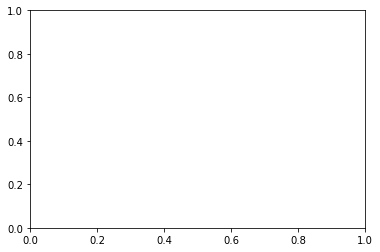

In [5]:
true_w = 3.0
true_b = 2.0
examples = 1000

inputs = tf.random.normal(shape=[examples])
noise = tf.random.normal(shape=[examples])
outputs = inputs*true_w + true_b + noise

plt.scatter(inputs, outputs, c='b') # y
plt.scatter(inputs, model(inputs), c='r') # H(x)
plt.show()

In [ ]:
loss = loss_function(outputs, model(inputs))
print(loss)

In [ ]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss_function(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate*dW)
  model.b.assign_sub(learning_rate*db)

Ws, bs = [], [] # plot
epochs = 15
for epoch in range(epochs):
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss_function(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('epoch: %2d, W=%1.2f, b=%1.2f, loss=%2.5f'%(epoch, Ws[-1], bs[-1], current_loss))

In [ ]:
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.show()